In [ ]:
from pandas import datetime as dt
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection import train_test_split


# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
import pandas as pd
import numpy as np

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# lets check the null values

In [ ]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
store_df['Promo2SinceWeek'].fillna(0, inplace = True)
store_df['Promo2SinceYear'].fillna(0, inplace = True)
store_df['PromoInterval'].fillna(0, inplace = True)


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Week"]=df["Date"].dt.week%4
df["WeekOfYear"]=df["Date"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31


In [ ]:
df = df.merge(store_df, how='outer', on=['Store'])

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
df['Store'].unique() #########################

array([   1,    2,    3, ..., 1113, 1114, 1115])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


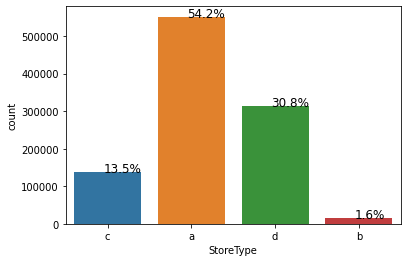

In [ ]:
ax = sns.countplot(df['StoreType'])
without_hue(ax, df['StoreType'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


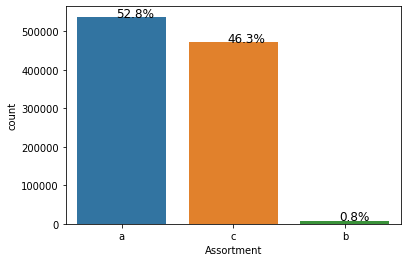

In [ ]:
ax = sns.countplot(df['Assortment'])
without_hue(ax, df['Assortment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


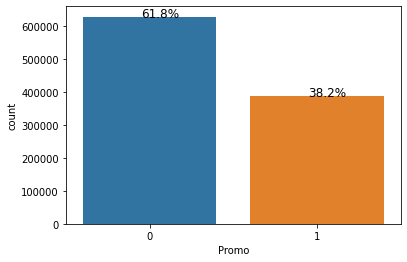

In [ ]:
ax = sns.countplot(df['Promo'])
without_hue(ax, df['Promo'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


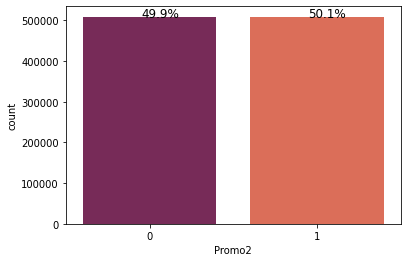

In [ ]:
ax = sns.countplot(df['Promo2'],palette="rocket")
without_hue(ax, df['Promo2'])

In [ ]:
df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [ ]:
df['Sales'].mean()

5773.818972305593

In [ ]:
df['Year'].unique()

array([2015, 2014, 2013])

In [ ]:
df[df['Year'] == 2013][df['Store'] == 1]['Sales'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4085.3150684931506

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
print(df[df['StoreType'] == 'a']['Sales'].mean())
print(df[df['StoreType'] == 'b']['Sales'].mean())
print(df[df['StoreType'] == 'c']['Sales'].mean())
print(df[df['StoreType'] == 'd']['Sales'].mean())


5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


In [ ]:
df2 = df.copy() # checkpoint

In [ ]:
df2.drop(['Date'], axis = 1, inplace = True)

In [ ]:
df2['CompetitionOpen'] = 0
df2['PromoOpen'] = 0

In [ ]:
df2['CompetitionOpen'] = (df2['CompetitionOpen'].where(df2['CompetitionOpenSinceYear'] == 0, other= (12 * (df2['Year'] - df2['CompetitionOpenSinceYear'])) + (df2['Month'] - df2['CompetitionOpenSinceMonth'])))
df2['PromoOpen'] = ( 12 * (df2['Year'] - df['Promo2SinceYear'])) + df2['Month'] - ((df2['Promo2SinceWeek']/4))


In [ ]:
df2[df2['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,30,3,27,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17927,20,7,0,0,0,0,0,0,2014,6,29,2,26,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17928,20,6,5572,566,1,0,0,0,2014,6,28,2,26,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17929,20,5,7149,839,1,0,0,0,2014,6,27,2,26,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17930,20,4,8118,997,1,0,0,0,2014,6,26,2,26,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,3325,291,1,0,0,0,2013,1,5,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013437,1111,5,4640,453,1,0,0,1,2013,1,4,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013438,1111,4,4579,444,1,0,0,1,2013,1,3,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013439,1111,3,5097,505,1,0,0,1,2013,1,2,1,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75


In [ ]:
# we can make these PromoOpen negative values to zeros, because they have not started the promos at that time

In [ ]:
df2.loc[df2['PromoOpen'] <0, 'PromoOpen' ] = 0

In [ ]:
df2[df2['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [ ]:
df2[df2['CompetitionOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
3890,5,2,7692,659,1,1,0,0,2015,3,31,2,14,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,-1,24183.0
3891,5,1,8847,770,1,1,0,0,2015,3,30,2,14,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,-1,24183.0
3892,5,7,0,0,0,0,0,0,2015,3,29,1,13,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,-1,24183.0
3893,5,6,2038,219,1,0,0,0,2015,3,28,1,13,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,-1,24183.0
3894,5,5,4181,499,1,0,0,0,2015,3,27,1,13,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,-1,24183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8,7.5


In [ ]:
df2.loc[df2['CompetitionOpen']<0, 'CompetitionOpen'] = 0

In [ ]:
df2[df2['CompetitionOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [ ]:
df2['CompetitionOpen'].value_counts()

0       186813
6        17418
4        17377
8        17348
7        17074
         ...  
640         28
199         28
1381        28
616         28
628         28
Name: CompetitionOpen, Length: 336, dtype: int64

In [ ]:
df2['PromoOpen'].value_counts()

0.0        70285
24166.0    16864
24183.0    16864
24161.0    16864
24185.0    16864
           ...  
48.0          31
46.0          31
56.0          31
49.0          31
47.0          30
Name: PromoOpen, Length: 293, dtype: int64

In [ ]:
df2['PromoOpen'].max() ###########

24187.0

In [ ]:
df2['PromoOpen']

0          24187.0
1          24187.0
2          24187.0
3          24187.0
4          24187.0
            ...   
1017204        7.5
1017205        7.5
1017206        7.5
1017207        7.5
1017208        7.5
Name: PromoOpen, Length: 1017209, dtype: float64

In [ ]:
df2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,31,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,30,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,29,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,28,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,27,3,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


In [ ]:
df2['PromoOpen'].min()

0.0

In [ ]:
# some negative and some huge values are there
# first I will convert the values to zero in PromoOpen which is having Promo2 = 0, because they have not started any promo so no open promo.

In [ ]:
# now we can remove the CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear

In [ ]:
df2[df2['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,26,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
6,1,6,4364,500,1,0,0,0,2015,7,25,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
7,1,5,3706,459,1,0,0,0,2015,7,24,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
8,1,4,3769,503,1,0,0,0,2015,7,23,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
9,1,3,3464,463,1,0,0,0,2015,7,22,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [ ]:
df2.loc[df2['Promo2'] ==0, 'PromoOpen'] = 0 # optimized code

In [ ]:
df2[df2['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,26,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
6,1,6,4364,500,1,0,0,0,2015,7,25,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
7,1,5,3706,459,1,0,0,0,2015,7,24,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
8,1,4,3769,503,1,0,0,0,2015,7,23,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
9,1,3,3464,463,1,0,0,0,2015,7,22,2,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [ ]:
df2['PromoOpen'].value_counts()

0.00     578316
39.75      4245
23.50      4169
24.50      4138
21.50      4134
          ...  
56.00        31
48.00        31
49.00        31
46.00        31
47.00        30
Name: PromoOpen, Length: 262, dtype: int64

In [ ]:
df2.drop(['CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear',	'Promo2',	'Promo2SinceWeek'	,'Promo2SinceYear'], axis= 1, inplace = True)

In [ ]:
# change StoreType and Assortment to encoder

In [ ]:
df2 = pd.get_dummies(columns = ['StoreType',	'Assortment'], data = df2, drop_first = True)

In [ ]:
i_sales = df2[df2['Sales'] == 0].index

In [ ]:
df2.drop(i_sales, inplace = True)

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
df2

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,0,1,5,5263,555,1,1,0,1,2015,7,31,3,31,1270.0,0,82,0.0,0,1,0,0,0
1,1,1,4,5020,546,1,1,0,1,2015,7,30,3,31,1270.0,0,82,0.0,0,1,0,0,0
2,2,1,3,4782,523,1,1,0,1,2015,7,29,3,31,1270.0,0,82,0.0,0,1,0,0,0
3,3,1,2,5011,560,1,1,0,1,2015,7,28,3,31,1270.0,0,82,0.0,0,1,0,0,0
4,4,1,1,6102,612,1,1,0,1,2015,7,27,3,31,1270.0,0,82,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,1115,1,6905,471,1,1,0,1,2013,1,7,2,2,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844334,1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844335,1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1
844336,1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,1,5350.0,"Mar,Jun,Sept,Dec",0,7.5,0,0,1,0,1


In [ ]:
col_df2 =['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'CompetitionDistance', 'PromoInterval', 'CompetitionOpen', 'PromoOpen',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Sales']

In [ ]:
df2 = df2.reindex(columns =col_df2)

In [ ]:
df2.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,1,5,555,1,1,0,1,2015,7,31,3,31,1270.0,0,82,0.0,0,1,0,0,0,5263
1,1,4,546,1,1,0,1,2015,7,30,3,31,1270.0,0,82,0.0,0,1,0,0,0,5020
2,1,3,523,1,1,0,1,2015,7,29,3,31,1270.0,0,82,0.0,0,1,0,0,0,4782
3,1,2,560,1,1,0,1,2015,7,28,3,31,1270.0,0,82,0.0,0,1,0,0,0,5011
4,1,1,612,1,1,0,1,2015,7,27,3,31,1270.0,0,82,0.0,0,1,0,0,0,6102


In [ ]:
print(df2['CompetitionOpen'].max())
print(df2['CompetitionOpen'].min())

print(df2['PromoOpen'].max())
print(df2['PromoOpen'].min()) ########


1386
0
71.25
0.0


In [ ]:
df2[df2['CompetitionOpen'] == 1386]['Store'].unique()

array([815])

In [ ]:
df2[df2['PromoOpen'] == 71.25]['Store'].unique()

array([158, 277, 370, 612, 637, 808, 960])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


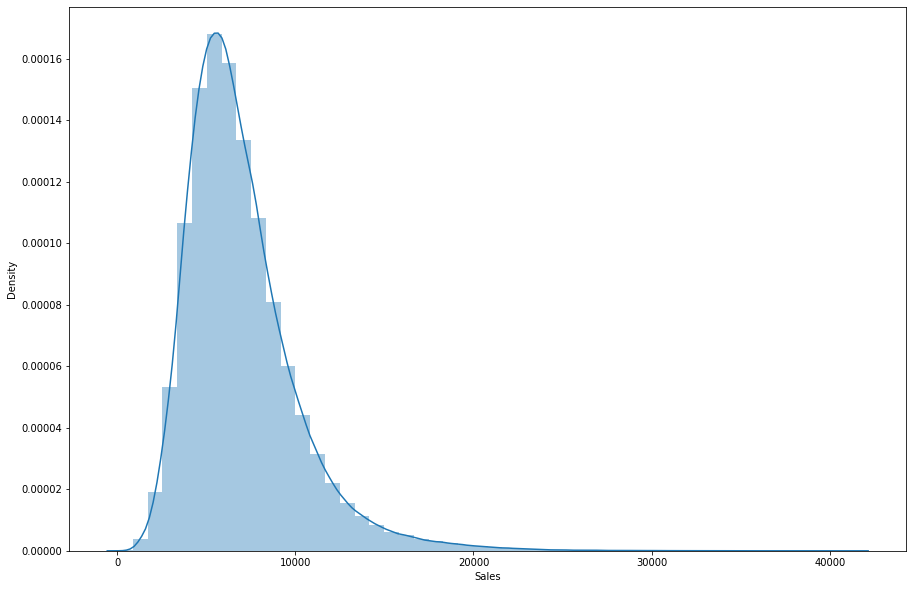

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df2['Sales'])

In [ ]:
# so its a right skewed, we can use log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


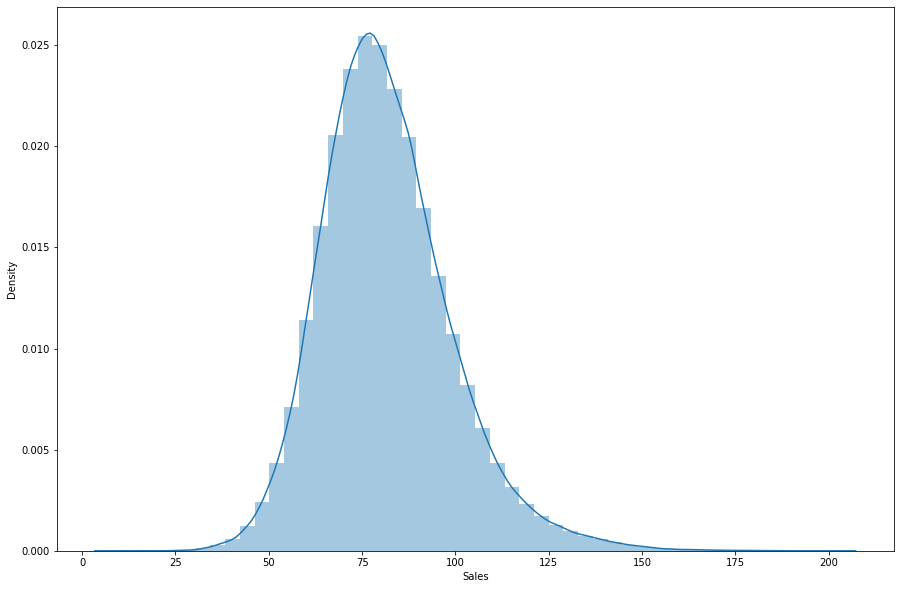

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df2['Sales']))

In [ ]:
df2 = pd.get_dummies(columns = ['PromoInterval', 'StateHoliday'], data = df2, drop_first = True)

In [ ]:
# lets check the independent variables

In [ ]:
df2.describe().columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'Week', 'WeekOfYear', 'CompetitionDistance',
       'CompetitionOpen', 'PromoOpen', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'Sales',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
numeric_feature = ['Customers', 'CompetitionDistance','CompetitionOpen', 'PromoOpen']

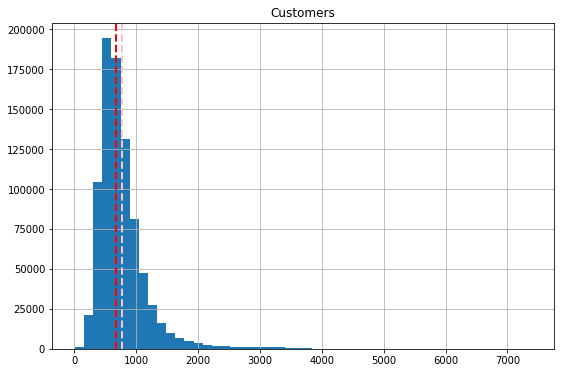

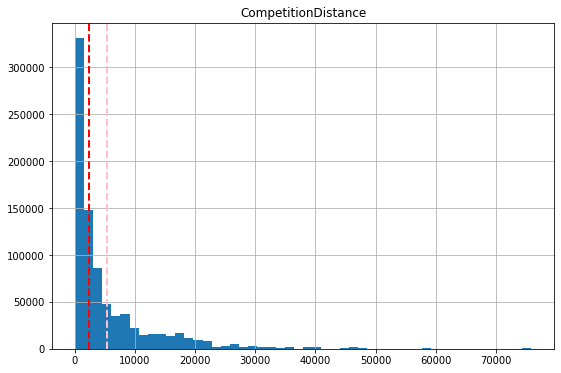

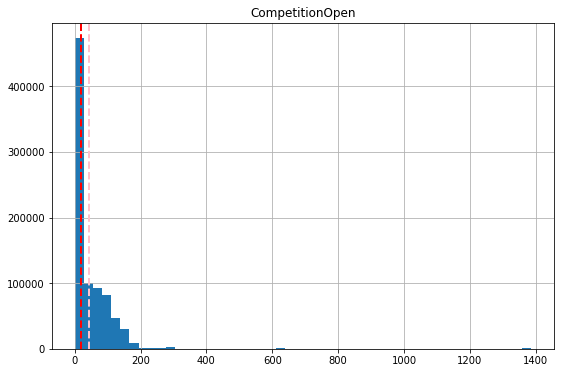

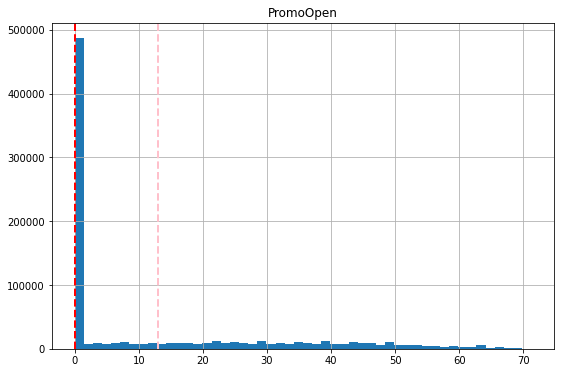

In [ ]:
for col in numeric_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df2[col].hist(bins=50, ax = ax)
  ax.axvline(df2[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(df2[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)




In [ ]:
# change to logarithm to get normal

In [ ]:
df2['PromoOpen'][14866]

0.0

In [ ]:
df2['Customer_ln'] = df2['Customers'].map(lambda x : np.log(x) if x != 0 else 0)
df2['CompetitionDistance_ln'] = df2['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
df2['PromoOpen_ln'] = df2['PromoOpen'].map(lambda x : np.log(x) if x != 0 else 0)
df2['CompetitionOpen_ln'] = df2['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)
df2['Sales_sqrt'] = df2['Sales'].map(lambda x : np.sqrt(x) if x != 0 else 0)



In [ ]:
numeric_feature_ln = ['Customer_ln','CompetitionDistance_ln','PromoOpen_ln','CompetitionOpen_ln']

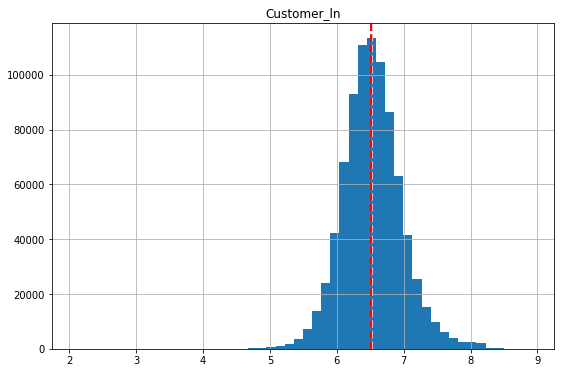

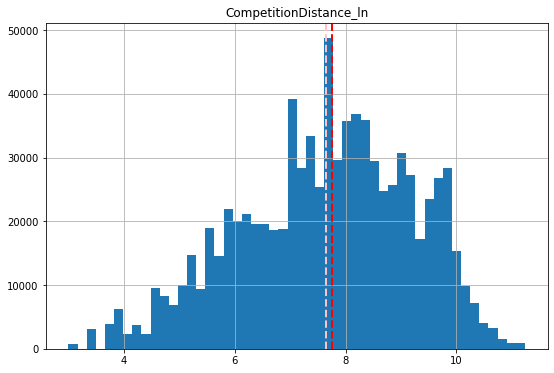

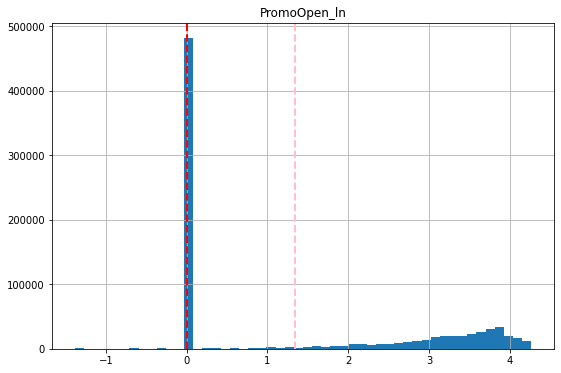

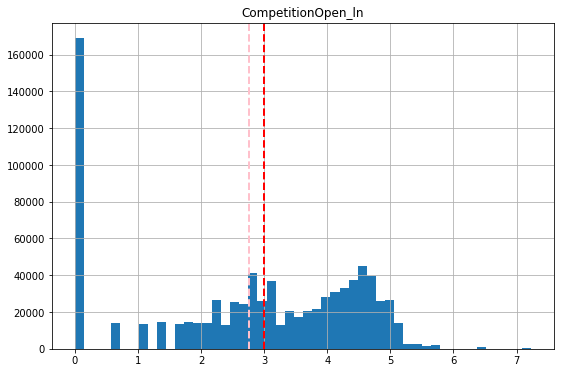

In [ ]:
for col in numeric_feature_ln:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df2[col].hist(bins=50, ax = ax)
  ax.axvline(df2[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(df2[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)

In [ ]:
df2

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,CompetitionDistance,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Customer_ln,CompetitionDistance_ln,PromoOpen_ln,CompetitionOpen_ln,Sales_sqrt
0,1,5,555,1,1,1,2015,7,31,3,31,1270.0,82,0.0,0,1,0,0,0,5263,0,0,0,1,0,0,0,6.318968,7.146772,0.000000,4.406719,72.546537
1,1,4,546,1,1,1,2015,7,30,3,31,1270.0,82,0.0,0,1,0,0,0,5020,0,0,0,1,0,0,0,6.302619,7.146772,0.000000,4.406719,70.851958
2,1,3,523,1,1,1,2015,7,29,3,31,1270.0,82,0.0,0,1,0,0,0,4782,0,0,0,1,0,0,0,6.259581,7.146772,0.000000,4.406719,69.152006
3,1,2,560,1,1,1,2015,7,28,3,31,1270.0,82,0.0,0,1,0,0,0,5011,0,0,0,1,0,0,0,6.327937,7.146772,0.000000,4.406719,70.788417
4,1,1,612,1,1,1,2015,7,27,3,31,1270.0,82,0.0,0,1,0,0,0,6102,0,0,0,1,0,0,0,6.416732,7.146772,0.000000,4.406719,78.115299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,471,1,1,1,2013,1,7,2,2,5350.0,0,7.5,0,0,1,0,1,6905,0,0,1,1,0,0,0,6.154858,8.584852,2.014903,0.000000,83.096330
844334,1115,6,339,1,0,1,2013,1,5,1,1,5350.0,0,7.5,0,0,1,0,1,4771,0,0,1,1,0,0,0,5.826000,8.584852,2.014903,0.000000,69.072426
844335,1115,5,326,1,0,1,2013,1,4,1,1,5350.0,0,7.5,0,0,1,0,1,4540,0,0,1,1,0,0,0,5.786897,8.584852,2.014903,0.000000,67.379522
844336,1115,4,300,1,0,1,2013,1,3,1,1,5350.0,0,7.5,0,0,1,0,1,4297,0,0,1,1,0,0,0,5.703782,8.584852,2.014903,0.000000,65.551506


In [ ]:
df2.drop(['Customers','CompetitionDistance','PromoOpen','CompetitionOpen'], axis =1, inplace = True)

In [ ]:
df2.drop(['Sales','Store'], axis =1, inplace = True)


In [ ]:
df2.head()

,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Customer_ln,CompetitionDistance_ln,PromoOpen_ln,CompetitionOpen_ln,Sales_sqrt
0,5,1,1,1,2015,7,31,3,31,0,1,0,0,0,0,0,0,1,0,0,0,6.318968,7.146772,0.0,4.406719,72.546537
1,4,1,1,1,2015,7,30,3,31,0,1,0,0,0,0,0,0,1,0,0,0,6.302619,7.146772,0.0,4.406719,70.851958
2,3,1,1,1,2015,7,29,3,31,0,1,0,0,0,0,0,0,1,0,0,0,6.259581,7.146772,0.0,4.406719,69.152006
3,2,1,1,1,2015,7,28,3,31,0,1,0,0,0,0,0,0,1,0,0,0,6.327937,7.146772,0.0,4.406719,70.788417
4,1,1,1,1,2015,7,27,3,31,0,1,0,0,0,0,0,0,1,0,0,0,6.416732,7.146772,0.0,4.406719,78.115299


In [ ]:
df2.Year.value_counts()

2013    337924
2014    310385
2015    196029
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


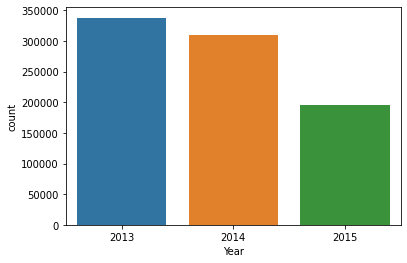

In [ ]:
sns.countplot(df2['Year'])

In [ ]:
from sklearn.preprocessing import StandardScaler
Scale =StandardScaler()
data = df2[['CompetitionDistance_ln','Customer_ln', 'Sales_sqrt','PromoOpen_ln','CompetitionOpen_ln']]
std_data=Scale.fit_transform(data)
std_data=pd.DataFrame(std_data, columns = 'scaled_'+ data.columns)
std_data.tail()

,scaled_CompetitionDistance_ln,scaled_Customer_ln,scaled_Sales_sqrt,scaled_PromoOpen_ln,scaled_CompetitionOpen_ln
844333,0.603229,-0.861084,0.088327,0.402423,-1.599798
844334,0.603229,-1.608170,-0.714806,0.402423,-1.599798
844335,0.603229,-1.697002,-0.811757,0.402423,-1.599798
844336,0.603229,-1.885819,-0.916446,0.402423,-1.599798
844337,0.603229,-1.848268,-1.188390,0.402423,-1.599798


In [ ]:
std_data[std_data['scaled_PromoOpen_ln'].isnull()]

,scaled_CompetitionDistance_ln,scaled_Customer_ln,scaled_Sales_sqrt,scaled_PromoOpen_ln,scaled_CompetitionOpen_ln


In [ ]:
df3=pd.concat([df2,std_data], axis=1)
df3.tail()

,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Customer_ln,CompetitionDistance_ln,PromoOpen_ln,CompetitionOpen_ln,Sales_sqrt,scaled_CompetitionDistance_ln,scaled_Customer_ln,scaled_Sales_sqrt,scaled_PromoOpen_ln,scaled_CompetitionOpen_ln
844333,1,1,1,1,2013,1,7,2,2,0,0,1,0,1,0,0,1,1,0,0,0,6.154858,8.584852,2.014903,0.0,83.096330,0.603229,-0.861084,0.088327,0.402423,-1.599798
844334,6,1,0,1,2013,1,5,1,1,0,0,1,0,1,0,0,1,1,0,0,0,5.826000,8.584852,2.014903,0.0,69.072426,0.603229,-1.608170,-0.714806,0.402423,-1.599798
844335,5,1,0,1,2013,1,4,1,1,0,0,1,0,1,0,0,1,1,0,0,0,5.786897,8.584852,2.014903,0.0,67.379522,0.603229,-1.697002,-0.811757,0.402423,-1.599798
844336,4,1,0,1,2013,1,3,1,1,0,0,1,0,1,0,0,1,1,0,0,0,5.703782,8.584852,2.014903,0.0,65.551506,0.603229,-1.885819,-0.916446,0.402423,-1.599798
844337,3,1,0,1,2013,1,2,1,1,0,0,1,0,1,0,0,1,1,0,0,0,5.720312,8.584852,2.014903,0.0,60.802960,0.603229,-1.848268,-1.188390,0.402423,-1.599798


In [ ]:
df3.columns

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'Week', 'WeekOfYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Customer_ln', 'CompetitionDistance_ln', 'PromoOpen_ln',
       'CompetitionOpen_ln', 'Sales_sqrt', 'scaled_CompetitionDistance_ln',
       'scaled_Customer_ln', 'scaled_Sales_sqrt', 'scaled_PromoOpen_ln',
       'scaled_CompetitionOpen_ln'],
      dtype='object')

In [ ]:
df3 = df3[['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'Week', 'WeekOfYear', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Customer_ln', 'CompetitionDistance_ln', 'PromoOpen_ln',
       'CompetitionOpen_ln', 'Sales_sqrt', 'scaled_CompetitionDistance_ln',
       'scaled_Customer_ln', 'scaled_PromoOpen_ln',
       'scaled_CompetitionOpen_ln','scaled_Sales_sqrt']]

In [ ]:
df3.drop(['Sales_sqrt','CompetitionOpen_ln','CompetitionDistance_ln', 'PromoOpen_ln','Customer_ln'],axis = 1, inplace = True)

In [ ]:
df3.tail()

,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,scaled_CompetitionDistance_ln,scaled_Customer_ln,scaled_PromoOpen_ln,scaled_CompetitionOpen_ln,scaled_Sales_sqrt
844333,1,1,1,1,2013,1,7,2,2,0,0,1,0,1,0,0,1,1,0,0,0,0.603229,-0.861084,0.402423,-1.599798,0.088327
844334,6,1,0,1,2013,1,5,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0.603229,-1.608170,0.402423,-1.599798,-0.714806
844335,5,1,0,1,2013,1,4,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0.603229,-1.697002,0.402423,-1.599798,-0.811757
844336,4,1,0,1,2013,1,3,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0.603229,-1.885819,0.402423,-1.599798,-0.916446
844337,3,1,0,1,2013,1,2,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0.603229,-1.848268,0.402423,-1.599798,-1.188390


In [ ]:
df_final = df3.copy() #checkpoint

In [ ]:
#lets check if there is any corelation and multicolinearity

In [ ]:
#plt.figure(figsize = (15,15))
#sns.heatmap(df_final.corr(), annot= True)

#Regression

###LinearRegression

In [ ]:
x = df_final.iloc[:,:-1]

In [ ]:
y = df_final['scaled_Sales_sqrt']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred,y_test)

0.8209586823153805

In [ ]:
#82% with LinearRegression

###Implementing Lasso

In [ ]:
lass = Lasso(alpha = 0.1, max_iter = 2000)

In [ ]:
lass.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
prediction_lasso = lass.predict(x_test)

In [ ]:
r2_score(y_test,prediction_lasso)

0.7296809311788559

In [ ]:
#lasso has dropped or ignore many features

### Decision tree with and without Crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
des_regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(des_regressor, x_train, y_train, cv=10).mean()

0.9429869531177097

In [ ]:
# if we use Descion tree directly without any validation tests

In [ ]:
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred_des = des_regressor.predict(x_test)

In [ ]:
r2_score(y_pred_des, y_test)

0.9457188032646296

### decision tree is the best for this dataset problem